<a href="https://colab.research.google.com/github/Douglas-Wilian/Topicos-em-IA/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NAIVE BAYES - WINE DATASET

Docente: José Alfredo
Discente: Douglas Wilian Lima Silva

In [1]:
#BIBLIOTECAS IMPORTANTES
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
#Carregamento da base de dados e criação do dataframe
wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#Separação das classes de treinamento e testes conforme realizado nos estudos anteriores
indices = np.random.permutation(data.shape[0])
div = int(0.4*len(indices)) #40% para treinamento e 60% para testes
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

xd = cj_desen.drop('target', axis =1)
yd = cj_desen.target

xt = cj_test.drop('target', axis=1)
yt = cj_test.target


display(xd.head())
display(yd.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0


23     0
130    2
76     1
114    1
10     0
Name: target, dtype: int64

In [4]:
nb = GaussianNB()

nb.fit(xd, yd) #Treinamento do modelo

pred = nb.predict(xt) #Resultados previstos

acuracia = accuracy_score(yt, pred)*100
cm = confusion_matrix(yt, pred)


In [5]:
print(f'A acurácia do teste foi {acuracia:.4f}%')

A acurácia do teste foi 96.2617%


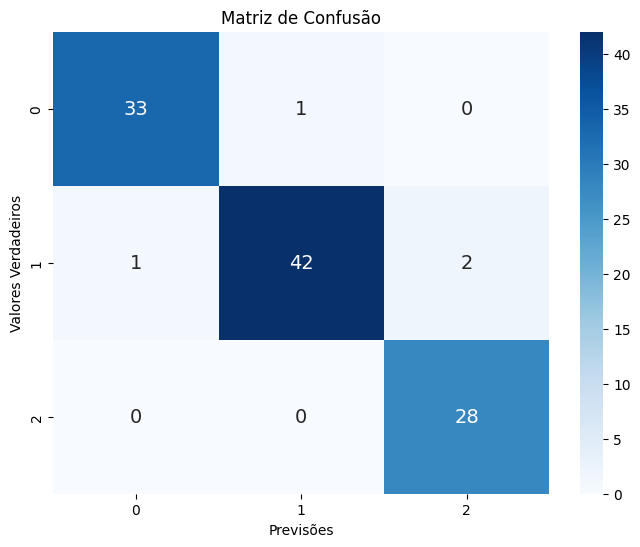

In [6]:
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [7]:
# Variação das porcentagens

p1 = [10, 20, 30, 40, 50]
vis=[]
columns = ['Média']
linhas = ['10%', '20%', '30%', '40%', '50%']
for pc in p1:
  media1 = 0
  for n in range(10):
    indices = np.random.permutation(data.shape[0])
    div = int((pc/100)*len(indices)) #40% para treinamento e 60% para testes
    desen_id , test_id = indices[:div], indices[div:]

    cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

    xd = cj_desen.drop('target', axis =1)
    yd = cj_desen.target

    xt = cj_test.drop('target', axis=1)
    yt = cj_test.target

    nb = GaussianNB()
    nb.fit(xd, yd)
    y_pred = nb.predict(xt)
    media1 = media1 + accuracy_score(yt, y_pred)

  vis.append(media1 / 10)

vd = pd.DataFrame(data = vis, columns=columns, index = linhas)

vd

,Média
10%,0.874534
20%,0.955245
30%,0.955200
40%,0.964486
50%,0.965169


##IMPLEMENTAÇÃO DO CÓDIGO COMPLETO

In [8]:
#Carregamento da base de dados e criação do dataframe
wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']
y = data['target'].to_numpy()

#Separação das classes de treinamento e testes conforme realizado nos estudos anteriores
indices = np.random.permutation(data.shape[0])
div = int(0.4*len(indices)) #40% para treinamento e 60% para testes
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

xd = cj_desen.drop('target', axis =1).to_numpy()
yd = cj_desen.target.to_numpy()

xt = cj_test.drop('target', axis=1).to_numpy()
yt = cj_test.target.to_numpy()

#Regra de Bayes
num_classes = len(np.unique(y))
probabilidadeDaClasse = np.zeros(num_classes)

for i in range(num_classes):
    indiceDaClasse = np.where(yd == i)
    probabilidadeDaClasse[i] = len(indiceDaClasse[0]) / len(yd)

#Matriz para armazenar as probabilidades de classe
matrizProbabilidade = np.zeros((xt.shape[0], num_classes))

#Calcular as probabilidades de classe
for i in range(num_classes):
    indiceDaClasse = np.where(yd == i)
    dadosDeTreino = xd[indiceDaClasse]
    media = np.mean(dadosDeTreino, axis=0)
    covariancia = np.cov(dadosDeTreino, rowvar=False)

    for j in range(xt.shape[0]):
        observation = xt[j]
        matrizProbabilidade[j, i] = multivariate_normal.pdf(observation, mean=media, cov=covariancia, allow_singular=True) * probabilidadeDaClasse[i]

#Prever as classes com base nas probabilidades:
y_pred = np.argmax(matrizProbabilidade, axis=1)

#Calcular a acurácia das previsões:
accuracy = accuracy_score(yt, y_pred)
print(f'Acurácia: {accuracy:.4f}')


Acurácia: 0.7009


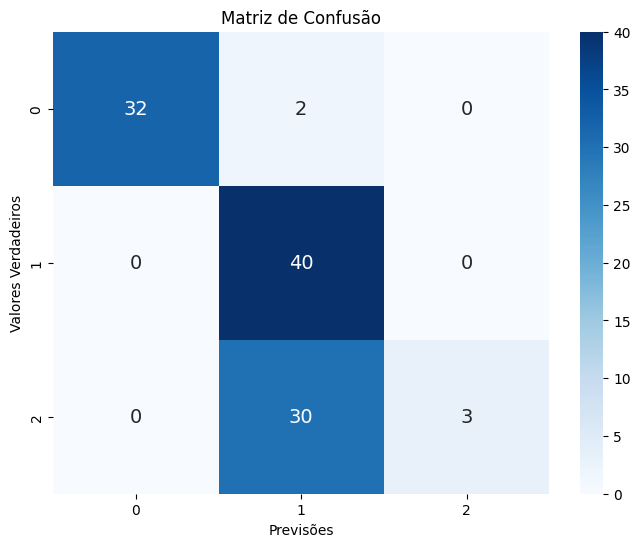

In [9]:
cm1 = confusion_matrix(yt, y_pred)
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [10]:
# Variação das porcentagens

p1 = [10, 20, 30, 40, 50]
vis=[]
columns = ['Média']
linhas = ['10%', '20%', '30%', '40%', '50%']
for pc in p1:
  media1 = 0
  for n in range(10):
    indices = np.random.permutation(data.shape[0])
    div = int((pc/100)*len(indices)) #40% para treinamento e 60% para testes
    desen_id , test_id = indices[:div], indices[div:]

    cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

    xd = cj_desen.drop('target', axis =1).to_numpy()
    yd = cj_desen.target.to_numpy()

    xt = cj_test.drop('target', axis=1).to_numpy()
    yt = cj_test.target.to_numpy()

    num_classes = len(np.unique(y))
    probabilidadeDaClasse = np.zeros(num_classes)

    for i in range(num_classes):
      indiceDaClasse = np.where(yd == i)
      probabilidadeDaClasse[i] = len(indiceDaClasse[0]) / len(yd)

    #Matriz para armazenar as probabilidades de classe
    matrizProbabilidade = np.zeros((xt.shape[0], num_classes))

    #Calcular as probabilidades de classe
    for i in range(num_classes):
      indiceDaClasse = np.where(yd == i)
      dadosDeTreino = xd[indiceDaClasse]
      media = np.mean(dadosDeTreino, axis=0)
      covariancia = np.cov(dadosDeTreino, rowvar=False)

      for j in range(xt.shape[0]):
        observation = xt[j]
        matrizProbabilidade[j, i] = multivariate_normal.pdf(observation, mean=media, cov=covariancia, allow_singular=True) * probabilidadeDaClasse[i]

    #Prever as classes com base nas probabilidades:
    y_pred = np.argmax(matrizProbabilidade, axis=1)
    media1 = media1 + accuracy_score(yt, y_pred)

  vis.append(media1 / 10)

vd = pd.DataFrame(data = vis, columns=columns, index = linhas)

vd

,Média
10%,0.336646
20%,0.388112
30%,0.674400
40%,0.862617
50%,0.973034
